In [219]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
#matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

plt.rcParams['figure.dpi']=150  #that makes plots higher res (and bigger)


Set up the simulation of the Hodgkin/Huxley Equations (V_HH = -V-65), with current definition of membrane potential (V=Vin-Vout)

## The HH model

set the constants

In [220]:
vna=50  
vk=-77
vl=-54.4
gna=120
gk=36
gl=.3
c=1

In [221]:
v_init=-65  #the initial conditions
m_init=.052
h_init=.596
n_init=.317

nsteps=100000   #number of timesteps to integrate
dt=0.01        #timestep, units of ms

Set up arrays to hold dynamical variables

In [222]:
v=np.zeros([nsteps])
m=np.zeros([nsteps])
n=np.zeros([nsteps])
h=np.zeros([nsteps])
t=np.zeros([nsteps])

# set the initial conditions to be the first entry in the vectors

m[0]=m_init #set the initial conditions to be the first entry in the vectors
n[0]=n_init
h[0]=h_init
v[0]=v_init
t[0]=0.0

### Define functions -- channel opening and closing rates 

In [223]:
def beta_n(v):
    r =.125*np.exp(-(v+65)/80)
    return r

def beta_m(v):
    r =  4*np.exp(-(v+65)/18)
    return r

def beta_h(v):
    r =  1/(1+np.exp(-(v+35)/10))
    return r

def alpha_n(v):
    r =  .01*(v+55)/(1-np.exp(-(v+55)/10))
    return r

def alpha_m(v):
    r =  .1*(v+40)/(1-np.exp(-(v+40)/10))
    return r

def alpha_h(v):
    r =  .07*np.exp(-(v+65)/20)
    return r



In [224]:
#for spike detection

thresh=0
numpeak = 0
peaktime=np.zeros([0])

## Parameters for Ca-mediated K, burst-modulating current 

In [225]:
tauK_Ca= 15  #time constant for decay of Ca-mediated K current
DeltaK_Ca= 2  #jump Ca-mediated K current at each spike
gK_Ca_bar=10  #conductance of K current, per "number" of open channels

# gating variable for Ca-mediated k current
fK_Ca=np.zeros([nsteps])

## Set the applied current and run simulation
*   Note -- add new Ca-mediated K conductance at end of voltage update line 



In [226]:
I=16.35

iter_arr=np.arange(nsteps-1)

for step in iter_arr:
    
    #Note -- add new Ca-mediated K conductance at end of line here!
    v[step+1]=v[step]+((I - gna*h[step]*(v[step]-vna)*m[step]**3 -gk*(v[step]-vk)*n[step]**4-gl*(v[step]-vl) 
                        - gK_Ca_bar*(v[step]-vk)*fK_Ca[step] )/c)*dt

    m[step+1]=m[step]+ (alpha_m(v[step])*(1-m[step])-beta_m(v[step])*m[step])*dt
    h[step+1]=h[step]+ (alpha_h(v[step])*(1-h[step])-beta_h(v[step])*h[step])*dt
    n[step+1]=n[step]+ (alpha_n(v[step])*(1-n[step])-beta_n(v[step])*n[step])*dt
    
    #Ca-mediated conductance:  exp decay with time constant tauK_Ca,
    #between spikes
    fK_Ca[step+1] = fK_Ca[step] + (-(tauK_Ca)**-1*fK_Ca[step])*dt 
    
    
    t[step+1]=t[step]+dt

    #Detect spikes, and adjust gating variable for Ca-mediated k current
 
    #condition for spike detection:  decreasing now, increased before, over threshold
    if [step>1] and v[step+1]<v[step] and v[step]>v[step-1] and v[step]>thresh: 
            peaktime=np.append(peaktime,t[step+1])
          
            #When spikes detected, gating variable for Ca-mediated k current fK_Ca, jumps by DeltaK_Ca 
            fK_Ca[step+1] = fK_Ca[step] + DeltaK_Ca    


            

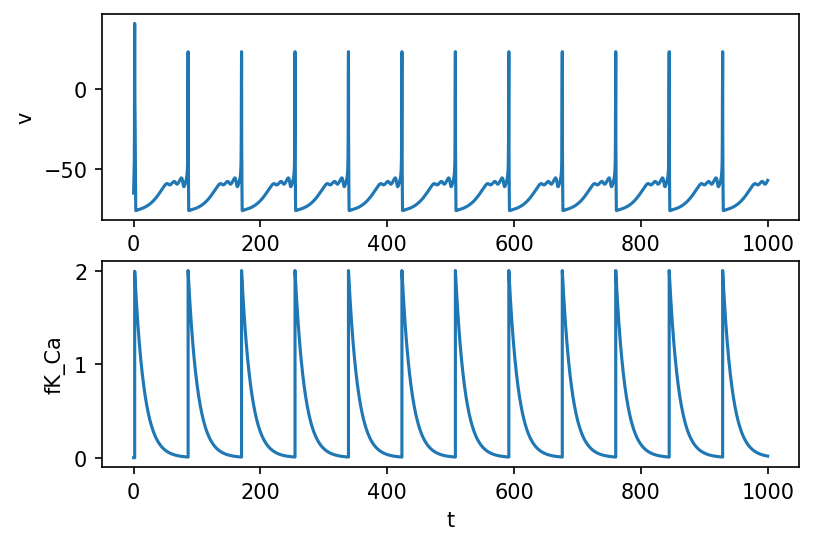

In [227]:
            
###### Now plot results ##########            
plt.subplot(2,1,1)
plt.plot(t,v)
plt.xlabel('t')
plt.ylabel('v')
#add * at spike times at 0 voltage
#plt.plot(peaktime,np.zeros(peaktime.size),'*')


plt.subplot(212)
plt.plot(t,fK_Ca)
plt.xlabel('t')
plt.ylabel('fK_Ca')
#add * at spike times at 0 voltage
#plt.plot(peaktime,np.zeros(peaktime.size),'*')

plt.show()